# Social Network Analysis: Lab Exercise 2
## Full name: *Andreas Kontogiannis*
### Student NTUA Username: el15187
#### ECE, NTUA, 2019-2020

<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις τεχνικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες επιπρόσθετες, με στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

**Highlights:**
- Newman-Girvan, Hierarchical clustering method
- Spectral Clustering, Machine Learning unsupervised method
- Modularity Maximization

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import itertools
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων και της πολυπλοκότητας ανάλυσης που ανακύπτει. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Ο βαθμός κάθε κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Ο συντελεστής ομαδοποίησης κάθε κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Την ενδιαμεσική εγώκεντρικότητα κάθε κόμβου και τη μέση ενδιαμεσική εγωκεντρικότητα.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>
<p style=text-align:justify><b>Προσοχή!</b> Θα πρέπει να ελέγξετε αν οι γράφοι είναι κατευθυνόμενοι, δηλ. οι αντίστοιχοι πίνακες γειτνίασης είναι μη συμμετρικοί. Στην περίπτωση αυτή, θα πρέπει να τους μετατρέψετε σε μη-κατευθυνόμενους με τουλάχιστον το ίδιο πλήθος συνδέσεων, <b>προτού</b> εφαρμόσετε τους αλγόριθμους εντοπισμού κοινοτήτων του <b>πίνακα 2</b>. </p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες από την ιστοσελίδα <a style=text-decoration:none href="http://www-personal.umich.edu/~mejn/netdata/">http://www-personal.umich.edu/~mejn/netdata/</a> </caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>
<tr>
    <td style=text-align:left>Les Miserables</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/lesmis.zip'>lesmis.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>lesmis.gml</b> contains the weighted network of coappearances of
characters in Victor Hugo's novel "Les Miserables".  Nodes represent characters as indicated by the labels and edges connect any pair of characters that appear in the same chapter of the book.  The values on the edges are the number of such coappearances.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Dolphin social network</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/dolphins.zip'>dolphins.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>dolphins.gml</b> contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003)</p>
    </td>
</tr> 
</table>

<h4>1. Παραγωγή συνθετικών τοπολογιών</h4> 

In [193]:
# el15187
n = 170

d = 4
M = 750
R = 0.15
p = 0.3
k = 4

REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n, M)

#we need to ensure connectivity for spectral clustering to work
RGG = nx.random_geometric_graph(n, R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
    
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n,k,p)

<h4>2. Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [3]:
football = nx.read_gml('football.gml')

In [5]:
print("Is football directed? ", nx.is_directed(football))

Is football directed?  False


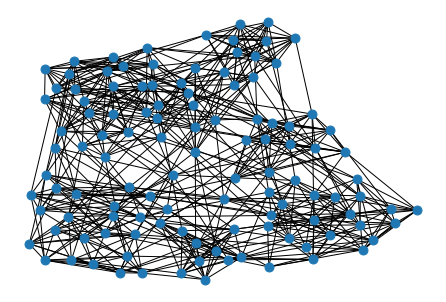

In [12]:
#visualize football
nx.draw(football, node_size=80)

In [4]:
lesmis = nx.read_gml('lesmis.gml')

In [7]:
#check if lesmis is directed
print("Is lesmis directed? ", nx.is_directed(lesmis))

Is lesmis directed?  False


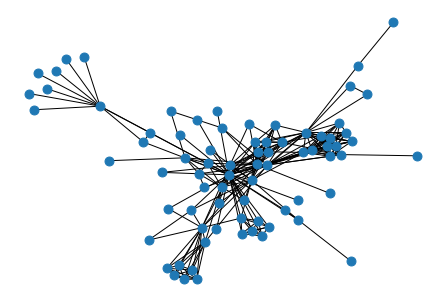

In [13]:
#visualize lesmis
nx.draw(lesmis, node_size=80)

In [192]:
dolphins = nx.read_gml('dolphins.gml')

In [9]:
#check if dolphins is directed
print("Is dolphins directed? ", nx.is_directed(dolphins))

Is dolphins directed?  False


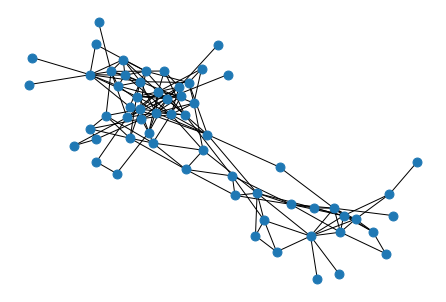

In [14]:
#visualize dolphins
nx.draw(dolphins, node_size=80)

Παρατηρούμε ότι κανένα εκ των τριών γραφημάτων δεν είναι κατευθυνόμενο. Επομένως, η μελέτη μας θα αφορά μόνο μη κατευθυνόμενα γραφήματα.

Επειδή τα γραφήματα των αρχείων που ανοίξαμε, περιείχαν ονόματα strings αντί για ακεραίους αριθμούς κατασκευάζουμε ένα λεξικό που κάνουμε mapping τα ονόματα αυτά με αριθμούς ξεκινώντας από το 0, προκειμένου να έχουμε τα γραφήματα σε μορφή για περαιτέρω μελέτη.  

In [187]:
#convert nodes' labels from strings to integers in real topologies
def conv2int(G, start_value):
    nG = nx.convert_node_labels_to_integers(G, first_label=start_value)
    G_mapping = dict(enumerate(G.nodes, 0))
    return nG, G_mapping

nfootball, football_map = conv2int(football, 0)
nlesmis, lesmis_map = conv2int(lesmis, 0)
ndolphins, dolphins_map = conv2int(dolphins, 0)

#G=nx.relabel_nodes(nG,G_mapping)

Θα πραγματοποιηθεί παρακάτω σχολιασμός και σύγκριση των πραγματικών τοπολογιών με των σύνθετων, που είχαν μελετηθεί σε βάθος στην προηγούμενη εργαστηριακή άσκηση.

<h4>3. Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

In [194]:
def find_degree(G):
    return dict(G.degree())

REG_degree = find_degree(REG)
RGER_degree = find_degree(RGER)
RGG_degree = find_degree(RGG)
SF_degree = find_degree(SF)
SW_degree = find_degree(SW)
football_degree = find_degree(nfootball) 
lesmis_degree = find_degree(nlesmis)
dolphins_degree = find_degree(ndolphins)

mean_degree_REG = np.mean(list(REG_degree.values()))
print("mean_degree_REG: \t", mean_degree_REG)

mean_degree_RGER = np.mean(list(RGER_degree.values()))
print('mean_degree_RGER: \t', mean_degree_RGER)

mean_degree_RGG = np.mean(list(RGG_degree.values()))
print('mean_degree_RGG: \t', mean_degree_RGG)

mean_degree_SW = np.mean(list(SW_degree.values()))
print('mean_degree_SW: \t', mean_degree_SW)

mean_degree_SF = np.mean(list(SF_degree.values()))
print('mean_degree_SF: \t', mean_degree_SF)

mean_degree_football = np.mean(list(football_degree.values()))
print('mean_degree_football: \t', mean_degree_football)

mean_degree_lesmis = np.mean(list(lesmis_degree.values()))
print('mean_degree_lesmis: \t', mean_degree_lesmis)

mean_degree_dolphins = np.mean(list(dolphins_degree.values()))
print('mean_degree_dolphins: \t', mean_degree_dolphins)

mean_degree_REG: 	 4.0
mean_degree_RGER: 	 8.823529411764707
mean_degree_RGG: 	 10.847058823529412
mean_degree_SW: 	 4.0
mean_degree_SF: 	 7.811764705882353
mean_degree_football: 	 10.660869565217391
mean_degree_lesmis: 	 6.597402597402597
mean_degree_dolphins: 	 5.129032258064516


(array([15.,  6.,  5.,  8.,  8.,  7.,  4.,  4.,  2.,  3.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

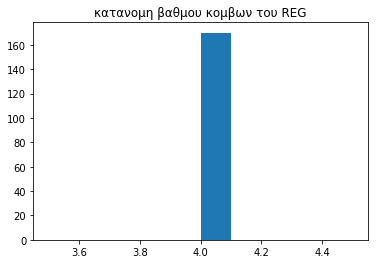

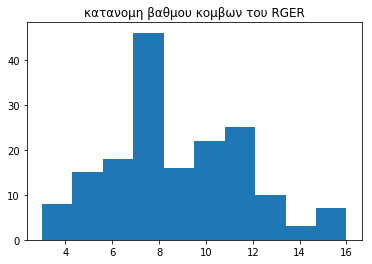

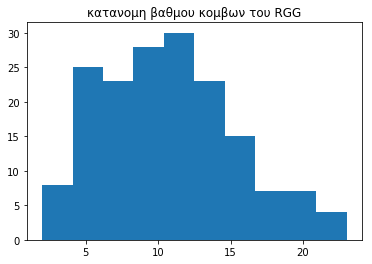

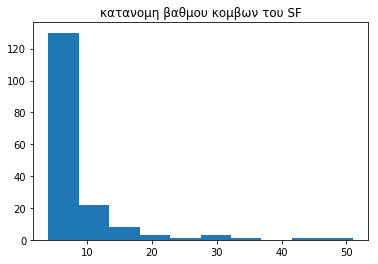

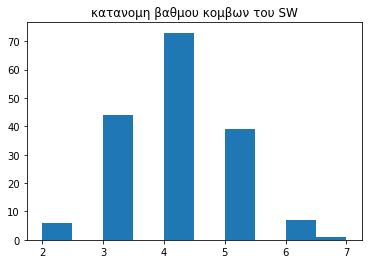

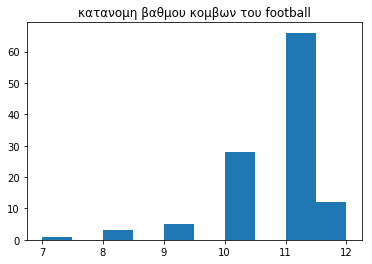

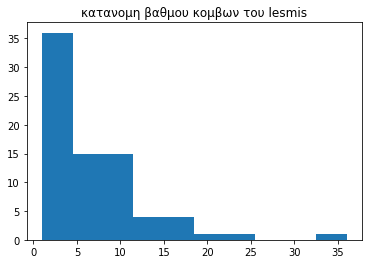

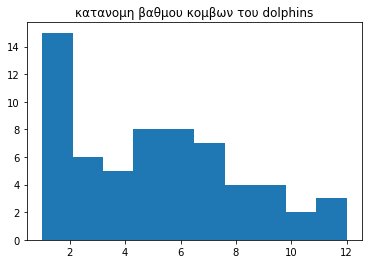

In [195]:
# graph_degree: dict{pos} = degree
def list_node_degrees(graph_degree):
    return list(graph_degree.values())

def find_discriminant_degrees(graph_degree):
    degrees = list_node_degrees(graph_degree)
    max_degree = np.max(degrees)
    # Frequency Table of degrees
    freq_degree = []
    for i in range(max_degree + 1):
        freq_degree.append(0)
        
    for degree in degrees:
        freq_degree[degree] += 1
            
    x_hist = []
    for i in range(len(freq_degree)):
        if (freq_degree[i] > 0):
            for j in range(freq_degree[i]):
                x_hist.append(i)
    return x_hist


plt.figure(1)
plt.title("κατανομη βαθμου κομβων του REG")
plt.hist(find_discriminant_degrees(REG_degree))
plt.figure(2)
plt.title("κατανομη βαθμου κομβων του RGER")
plt.hist(find_discriminant_degrees(RGER_degree))
plt.figure(3)
plt.title("κατανομη βαθμου κομβων του RGG")
plt.hist(find_discriminant_degrees(RGG_degree))
plt.figure(4)
plt.title("κατανομη βαθμου κομβων του SF")
plt.hist(find_discriminant_degrees(SF_degree))
plt.figure(5)
plt.title("κατανομη βαθμου κομβων του SW")
plt.hist(find_discriminant_degrees(SW_degree))
plt.figure(6)
plt.title("κατανομη βαθμου κομβων του football")
plt.hist(find_discriminant_degrees(football_degree))
plt.figure(7)
plt.title("κατανομη βαθμου κομβων του lesmis")
plt.hist(find_discriminant_degrees(lesmis_degree))
plt.figure(8)
plt.title("κατανομη βαθμου κομβων του dolphins")
plt.hist(find_discriminant_degrees(dolphins_degree))

Βλέποντας τις μέσες τιμές, παρατηρούμε ότι το football είναι πολύ κοντά με το RGG, κάτι όμως το οποίο δεν φαίνεται να τηρείται στην κατανομή των βαθμών τους. Από την άλλη, το lesmis φαίνεται να είναι πολύ κοντά και στην μέση τιμή και στην κατανομή του βαθμού με το SF, γεγονός που συμφωνεί και η υπάρχουσα βιβλιογραφία. Τέλος, το dolphin φαίνεται να είναι και αυτό κοντά με το SF, αλλά όχι τόσο ξεκάθαρα όσο το lesmis.

<h4>4. Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

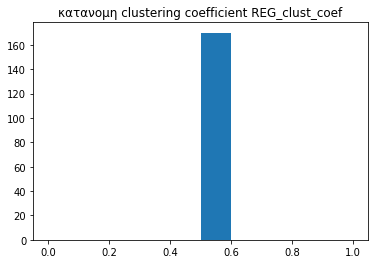

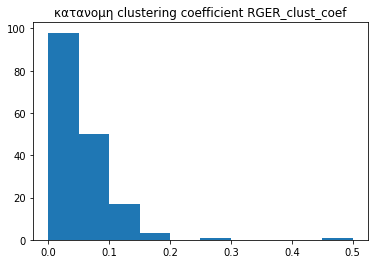

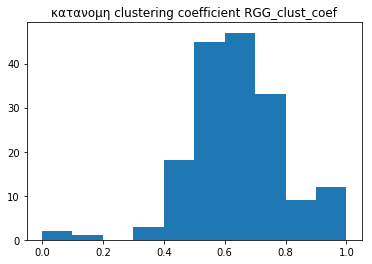

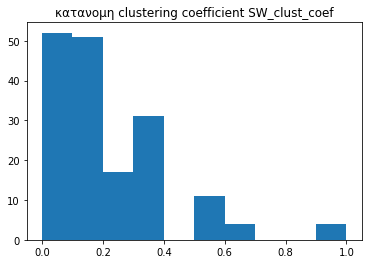

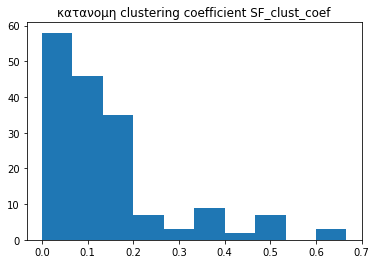

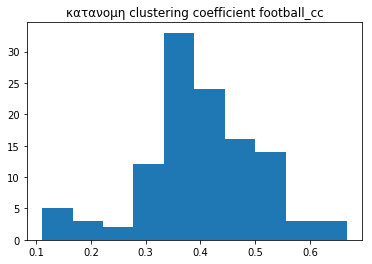

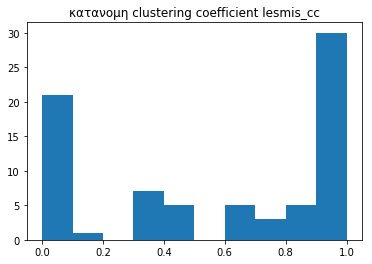

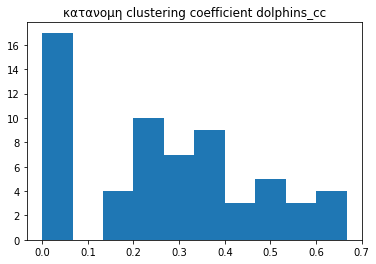

In [29]:
def calculate_clust_coef(G):
    return nx.clustering(G)

REG_clust_coef = calculate_clust_coef(REG)
RGER_clust_coef = calculate_clust_coef(RGER)
RGG_clust_coef = calculate_clust_coef(RGG)
SF_clust_coef = calculate_clust_coef(SF)
SW_clust_coef = calculate_clust_coef(SW)
football_cc = calculate_clust_coef(nfootball)
lesmis_cc = calculate_clust_coef(nlesmis)
dolphins_cc = calculate_clust_coef(ndolphins)

def cc_hist(item, idx, name):
    plt.figure(idx)
    plt.title("κατανομη clustering coefficient " + name)
    plt.hist(item.values())
    
graphs = [REG_clust_coef, RGER_clust_coef, RGG_clust_coef, 
          SW_clust_coef, SF_clust_coef,
          football_cc, lesmis_cc, dolphins_cc]

names = ['REG_clust_coef', 'RGER_clust_coef', 'RGG_clust_coef', 
         'SW_clust_coef', 'SF_clust_coef', 'football_cc', 'lesmis_cc', 'dolphins_cc']

for i,cc in enumerate(graphs):
    cc_hist(cc, i, names[i])    
           

In [27]:
mean_cc_REG = np.mean(list(REG_clust_coef.values()))
print('mean_cc_REG: \t\t', mean_cc_REG)

mean_cc_RGER = np.mean(list(RGER_clust_coef.values()))
print('mean_cc_RGER: \t\t', mean_cc_RGER)

mean_cc_RGG = np.mean(list(RGG_clust_coef.values()))
print('mean_cc_RGG: \t\t', mean_cc_RGG)

mean_cc_SW = np.mean(list(SW_clust_coef.values()))
print('mean_cc_SW: \t\t', mean_cc_SW)

mean_cc_SF = np.mean(list(SF_clust_coef.values()))
print('mean_cc_SF: \t\t', mean_cc_SF)

mean_cc_football = np.mean(list(football_cc.values()))
print('mean_cc_football: \t', mean_cc_football)

mean_cc_lesmis = np.mean(list(lesmis_cc.values()))
print('mean_cc_lesmis: \t', mean_cc_lesmis)

mean_cc_dolphins = np.mean(list(dolphins_cc.values()))
print('mean_cc_dolphins: \t', mean_cc_dolphins)

mean_cc_REG: 		 0.5
mean_cc_RGER: 		 0.05308651844118972
mean_cc_RGG: 		 0.6371732808966464
mean_cc_SW: 		 0.2
mean_cc_SF: 		 0.13011810435886204
mean_cc_football: 	 0.40321601104209803
mean_cc_lesmis: 	 0.5731367499320135
mean_cc_dolphins: 	 0.2589582460550202


Παρατηρούμε πως όσον αφορά το mean clustering coefficient, το football φαίνεται αυτήν τη φορά να ομοιάζει περισσότερο με το REG, παρόλο που η κατανομή του δεν είναι σταθερή όπως του REG. Παράλληλα, όσον αφορά το mean clustering coefficient, το lesmis εδώ φαίνεται να είναι πολύ κοντά με το RGG, και όχι με το scale-free δίκτυο που υποστηρίζει η υπάρχουσα βιβλιογραφία. Τέλος, το dolphins ομοιάζει περισσότερο με το SW αυτήν την φορά, κάτι το οποίο μπορούμε να αιτιολογήσουμε με το επιχείρημα πως η ιδιότητα small-world συνίσταται σε κοινότητες σχηματισμένες, όπως των δελφινιών. 

<h4>5. Μελέτη ενδιαμεσικής εγω-κεντρικότητας για πραγματικές και συνθετικές τοπολογίες </h4>

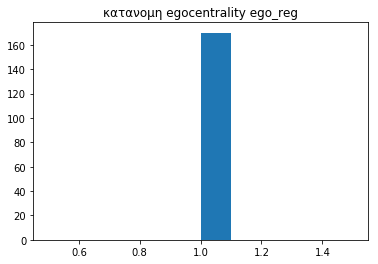

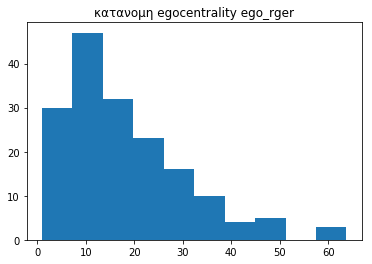

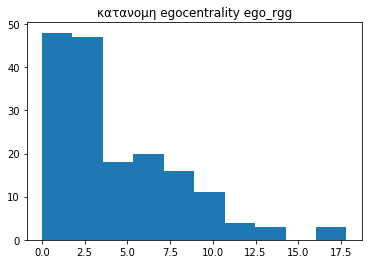

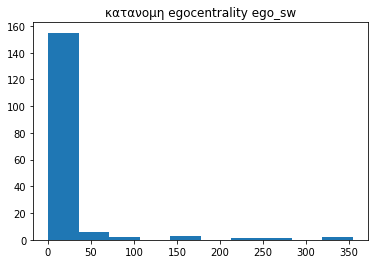

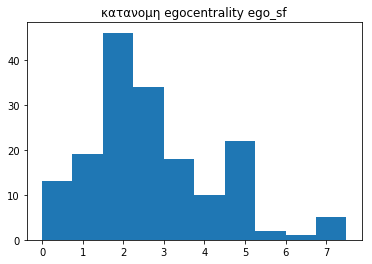

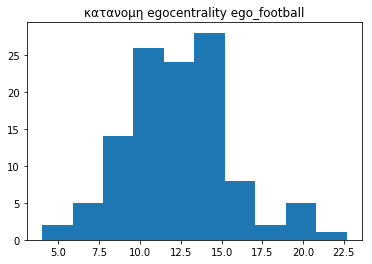

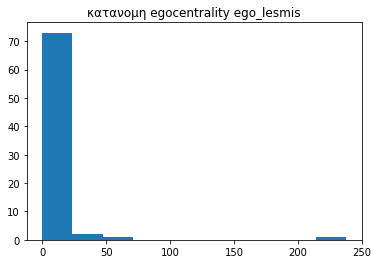

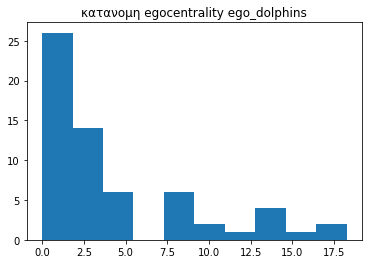

In [35]:
def ego_central(topology, name):
    ego_centrality_list = []
    for node in topology.nodes:
        node_ego = nx.ego_graph(topology, node)
        # adjacency matrix
        A = (nx.adj_matrix(node_ego)).todense()
        # A^2 * (1-A)
        hadamard = np.multiply(np.matmul(A,A), (1-A))
        triu = np.triu(hadamard, 1)
        triu = triu[triu > 0]
        ego_betweenness = np.sum([1/i for i in triu])
        ego_centrality_list.append(ego_betweenness / 2)

    return ego_centrality_list
    
ego_reg = ego_central(REG, "REG")
ego_rger = ego_central(RGER, "RGER")
ego_rgg = ego_central(RGG, "RGG")
ego_sf = ego_central(SF, "SF")
ego_sw = ego_central(SW, "SW")
ego_football = ego_central(nfootball, "football")
ego_lesmis = ego_central(nlesmis, "lesmis")
ego_dolphins = ego_central(ndolphins, "dolphins")

def ego_hist(item, idx, name):
    plt.figure(idx)
    plt.title("κατανομη egocentrality " + name)
    plt.hist(item)
    
graphs = [ego_reg, ego_rger, ego_rgg, 
          ego_sf, ego_sw, 
          ego_football, ego_lesmis, ego_dolphins]

names = ['ego_reg', 'ego_rger', 'ego_rgg', 'ego_sw',
         'ego_sf', 'ego_football', 'ego_lesmis', 'ego_dolphins']

for i,ego in enumerate(graphs):
    ego_hist(ego, i, names[i])    
           

In [38]:
mean_ego_REG = np.mean(ego_reg)
print("mean_ego_REG: \t\t", mean_ego_REG)

mean_ego_RGER = np.mean(ego_rger)
print("mean_ego_RGER: \t\t", mean_ego_RGER)

mean_ego_RGG = np.mean(ego_rgg)
print("mean_ego_RGG: \t\t", mean_ego_RGG)

mean_ego_SW = np.mean(ego_sw)
print("mean_ego_SW: \t\t", mean_ego_SW)

mean_ego_SF = np.mean(ego_sf)
print("mean_ego_SF: \t\t", mean_ego_SF)

mean_ego_football = np.mean(ego_football)
print("mean_ego_football: \t", mean_ego_football)

mean_ego_lesmis = np.mean(ego_lesmis)
print("mean_ego_lesmis: \t", mean_ego_lesmis)

mean_ego_dolphins = np.mean(ego_dolphins)
print("mean_ego_dolphins: \t", mean_ego_dolphins)

mean_ego_REG: 		 1.0
mean_ego_RGER: 		 18.312745098039215
mean_ego_RGG: 		 4.321740196078431
mean_ego_SW: 		 2.5294117647058822
mean_ego_SF: 		 20.06642156862745
mean_ego_football: 	 12.361066252587989
mean_ego_lesmis: 	 6.659230055658628
mean_ego_dolphins: 	 4.258736559139784


Παρατηρούμε πως τα dolphins έχουν ομοιότητες με το RGG και σε μέση τιμή εγω-κεντρικότητας και σε μορφή κατανομής, ενώ το lesmis με το SW. Ωστόσο, η εγω-κεντρικότητα βλέπουμε να μην έχει κάποιο αποτέλεσμα στην σύγκριση του football με τις υπόλοιπες τοπολογίες, καθώς τόσο η μέση τιμή όσο και η μορφή της κατανομής φαίνεται να αποκλίνουν σημαντικά. Λαμβάνοντας υπόψιν πως η εγω-κεντρικότητα δεν έδωσε ομοιότητες του lesmis με το SF, συμπεραίνουμε πως για τις πραγματικά αυτά γραφήματα δεν αποτελεί πολύ αξιόπιστο μέτρο σύγκρισης.

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<p>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<p>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία υπολογίστε το modularity χρησιμοποιώντας τη συνάρτηση networkx.algorithms.community.quality.modularity.</p>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

<h4>1. Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [168]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())
print((colors))

['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'ligh

<h4>2. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>

Ο αλγόριθμος Girvan-Newman αποτελέι μία hierarchical clustering method, που ανιχνεύει τις κοινότητες ενός γράφου με την προοδευτική αφαίρεση των ακμών από το αρχικό δίκτυο. Τα connected components του υπόλοιπου δικτύου είναι οι κοινότητες. Αντί να προσπαθήσουμε να κατασκευάσουμε ένα μέτρο που να μας λέει ποια ακμές είναι τα πιο κεντρικά για τις κοινότητες, ο αλγόριθμος Girvan-Newman επικεντρώνεται στις ακμές που είναι πιθανότατα "between" των κοινοτήτων.

To Vertex betweenness είναι ένας δείκτης πολύ κεντρικών κόμβων στα δίκτυα. Για κάθε κόμβο i, το Vertex betweenness ορίζεται ως ο αριθμός των μικρότερων μονοπατιών μεταξύ ζευγών κόμβων που διέρχονται από αυτό.

Ο αλγόριθμος Girvan-Newman επεκτείνει αυτόν τον ορισμό, ορίζοντας την "edge betweenness" μιας ακμής ως τον αριθμό των μικρότερων μονοπατιών μεταξύ των ζευγών κόμβων που τρέχουν κατά μήκος αυτού. Εάν υπάρχουν περισσότερες από ένα συντομότερα μονοπάτια μεταξύ ενός ζεύγους κόμβων, σε κάθε μονοπάτι εκχωρείται ίσο βάρος έτσι ώστε το συνολικό βάρος όλων των μονοπατιών να είναι ίσο με την μονάδα. Εάν ένα δίκτυο περιέχει κοινότητες που είναι μόνο χαλαρά συνδεδεμένες με μερικές εσωτερικές ακμές, τότε όλες τα μικρότερα μονοπάτια μεταξύ διαφορετικών κοινοτήτων πρέπει να έχουν μία από αυτές τις ελάχιστες άκρες. Επομένως, οι ακμές που συνδέουν τις κοινότητες θα έχουν μεγάλη edge betweenness (τουλάχιστον μία από αυτές). Αφαιρώντας αυτές τις ακμές, οι ομάδες αυτές διαχωρίζονται μεταξύ τους.

Τα βήματα του αλγορίθμου για ανίχνευση της κοινότητας είναι τα παρακάτω:
- Η απόσταση μεταξύ όλων των υπάρχουσων ακμών στο δίκτυο υπολογίζεται πρώτα.
- Οι ακμές με την highest betweenness αφαιρούνται.
- Η απόσταση μεταξύ όλων των ακμών που επηρεάζονται από την αφαίρεση υπολογίζεται εκ νέου.
- Τα βήματα 2 και 3 επαναλαμβάνονται έως ότου δεν παραμείνουν ακμές.

Δοκιμάζουμε πολλές διαφορετικές τιμές για το k, από 1 έως 50 και κρατάμε εκείνη με το μεγαλύτερο modularity για όλες τις προαναφερθείσες τοπολογίες.

In [67]:
# girvan_newman:partitions of at most k=50 communities, select the one with the highest value of modularity.

def comd_GN(G, name, k=50):
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    # at most k communities
    limited = itertools.takewhile(lambda c: len(c) <= k, comp)
    best_modularity = -1 
    best_comp = None
    best_i = 0
#     print(list(limited))
    for i,communities in enumerate(limited): 
#         print(name, "k =", i+2, 'modularity =', nx.algorithms.community.quality.modularity(G, communities))
#         print(tuple(sorted(c) for c in communities))
#         print()
        if best_modularity < nx.algorithms.community.quality.modularity(G, communities):
            best_modularity = nx.algorithms.community.quality.modularity(G, communities)
            best_comp = communities
            best_i = i+2
    
#    print()
    print(name, "k =", best_i, 'best modularity =', best_modularity)
    
    return tuple(sorted(c) for c in best_comp)


print('Newman-Girvan\n')
reg_gn = comd_GN(REG, "REG")
rger_gn = comd_GN(RGER, "RGER")
rgg_gn = comd_GN(RGG, "RGG")
sw_gn = comd_GN(SW, "SW")
sf_gn = comd_GN(SF, "SF")
football_gn = comd_GN(nfootball, "football")
lesmis_gn = comd_GN(nlesmis, "lesmis")
dolphins_gn = comd_GN(ndolphins, "dolphins")

Newman-Girvan

REG k = 8 best modularity = 0.8043598615917437
RGER k = 50 best modularity = 0.12630844444444214
RGG k = 7 best modularity = 0.6895919749954554
SW k = 10 best modularity = 0.6354108996539986
SF k = 39 best modularity = 0.20059379082595397
football k = 10 best modularity = 0.5996290274077911
lesmis k = 11 best modularity = 0.538068076136153
dolphins k = 5 best modularity = 0.519382144693642


<h4>3. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering.</h4>

Το Spectral Clustering αποτελεί τεχνική unsupervised Machine Learning, και χρησιμοποιείται σε μεγάλο βαθμό στην θεωρία δικτύων για την ανίχνευση κοινοτήτων κόμβων, βασισμένη στις ακμές που τους συνδέουν. Χρησιμοποιεί πληροφορίες από τις ιδιοτιμές (spectrum) ειδικών γραφημάτων που παράγονται από το γράφημα ή από το σύνολο δεδομένων. Με λίγα λόγια, ο αλγόριθμος παίρνει σαν είσοδο τον πίνακα γειτνίασης του αρχικού γράφου, $A$, και υπολογίζει τις ιδιοτιμές και τα αντίστοιχα ιδιοδιανύσματα. Κατασκευάζει αρχικά τον Degree Matrix, $D$, που είναι διαγώνιος και περιέχει στην διαγώνιο του στοιχεία που αποτελούν τον βαθμό της κάθε row του πίνακα γειτνίασης. Στην συνέχεια, κατασκεύαζει τον Graph Laplacian, $L = D - A$, o οποίος στην διαγώνιό του περιέχει τα degrees των κόμβων και στην off diagonal τα αρνητικά βάρη ακμών. Ο πίνακας αυτός έχει ορισμένες πολύ σημαντικές ιδιότητες (Fiedler value, spectral gap) που μας βοηθούν να βρούμε αποτελεσματικά το πλήθος των κοινοτήτων του γράφου, ερμηνεύοντας τις τιμές των ιδιοτιμών με τα connected components, και στην συνέχεια τις βρίσκει με χρήση του αλγορίθμου kmeans ή οποιωνδήποτε άλλων μετατροπών του.

Στην μελέτη μας, θα χρησιμοποιηθεί έτοιμη η υλοποίση του Spectral Clustering από το sklearn module της python. Δοκιμάζουμε πολλές διαφορετικές τιμές για το k, από 1 έως 50 και κρατάμε εκείνη με το μεγαλύτερο modularity για όλες τις προαναφερθείσες τοπολογίες.

In [71]:
# Spectral Clustering :all partitions of k={1,..50} communities
import warnings
warnings.simplefilter("ignore", UserWarning)

def comd_SC(G, name, k=50):
    # adjacent matrix of graph
    adj_mat = nx.to_numpy_matrix(G)
    best_modularity = -1 
    best_comp = None
    sc = None
    best_i = 0
    for i in range(1, k+1):
        sc = SpectralClustering(i)
        sc.fit(adj_mat)
        
        ar = np.arange(len(sc.labels_))
        communities = []
        for j in range(0, i):
            communities.append(set(ar[sc.labels_==j]))

#         print(name, "k =", i, 'modularity =', nx.algorithms.community.quality.modularity(G, communities))
#         print(sc.labels_)
#         print()
        if best_modularity < nx.algorithms.community.quality.modularity(G, communities):
            best_modularity = nx.algorithms.community.quality.modularity(G, communities)
            best_comp = communities       
            best_i = i
        
    
#     print()
    print(name, "k =", best_i, 'best modularity =', best_modularity)
    return tuple(sorted(c) for c in best_comp)


print('Spectral Clustering\n')
reg_sc = comd_SC(REG, "REG")
rger_sc = comd_SC(RGER, "RGER")
rgg_sc = comd_SC(RGG, "RGG")
sw_sc = comd_SC(SW, "SW")
sf_sc = comd_SC(SF, "SF")
football_sc = comd_SC(nfootball, "football")
lesmis_sc = comd_SC(nlesmis, "lesmis")
dolphins_sc = comd_SC(ndolphins, "dolphins")

Spectral Clustering

REG k = 10 best modularity = 0.8116955017301418
RGER k = 6 best modularity = 0.013840000000000451
RGG k = 12 best modularity = 0.5498743943072864
SW k = 14 best modularity = 0.4212932525951501
SF k = 7 best modularity = 0.02945932827696302
football k = 10 best modularity = 0.5972512367970692
lesmis k = 5 best modularity = 0.46370667741335814
dolphins k = 4 best modularity = 0.17768284482417693


<h4>4. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>

Η παρακάτω μέθοδος για ανίχνευση κοινοτήτων λειτουργεί με άπληστο τρόπο. Χρησιμοποιεί τον αλγόριθμο Clauset-Newman-Moore greedy Modularity Maximization, ο οποίος αρχίζει θεωρώντας κάθε κόμβο μία κοινότητα. Ύστερα, ενώνει κοινότητες με κριτήριο η ένωση τους να αυξάνει το modularity μέχρι να φτάσει στο αρχικό γράφημα, δηλαδή να υπάρχει μία κοινότητα. Ο αλγόριθμος αυτός επιστρέφει τον διαχωρισμό με την maximum modularity.

In [76]:
# Modularity Maximization

def comd_MM(G, name):
    communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
    modularity = nx.algorithms.community.quality.modularity(G, communities)
    print(name, " modularity =", modularity)
#     print(communities)
#     print()
    return communities


print('Modularity Maximization\n')
reg_mm = comd_MM(REG, "REG")
rger_mm = comd_MM(RGER, "RGER")
rgg_mm = comd_MM(RGG, "RGG")
sw_mm = comd_MM(SW, "SW")
sf_mm = comd_MM(SF, "SF")
football_mm = comd_MM(nfootball, "football")
lesmis_mm = comd_MM(nlesmis, "lesmis")
dolphins_mm = comd_MM(ndolphins, "dolphins")

Modularity Maximization

REG  modularity = 0.7137716262976508
RGER  modularity = 0.29410311111111426
RGG  modularity = 0.6412091781499003
SW  modularity = 0.6405536332180055
SF  modularity = 0.2980158586151729
football  modularity = 0.5497406651426727
lesmis  modularity = 0.5005967511935037
dolphins  modularity = 0.49549068470392815


<h4>5. Οπτικοποίηση κοινοτήτων σε συνθετικά και πραγματικά δίκτυα και σχολιασμός παραπάνω αποτελεσμάτων.</h4>

In [171]:
# Visualization
def visual_com(G, communities, titler):
    node_list = []
    color_node = []
    for i in range(len(communities)):
        color = colors[i % 156]
        for c in communities[i]:
            node_list.append(c)
            color_node.append(color)
    plt.figure(1, figsize = (8,8))
    plt.title(titler)
    node_position = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos=node_position, nodelist=node_list, node_color=color_node, node_size=90)
    nx.draw_networkx_edges(G, pos=node_position)

<p>a. Οπτικοποίηση κοινοτήτων Les Miserables (lesmis).</p>

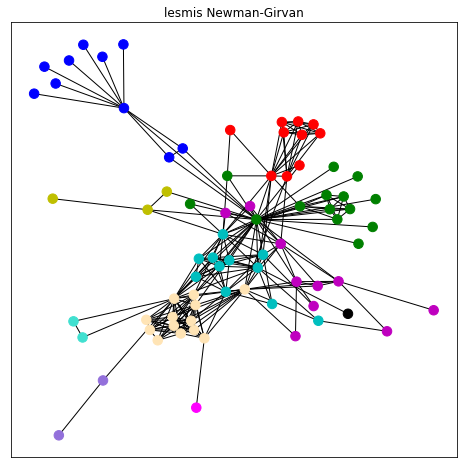

In [152]:
visual_com(nlesmis, lesmis_gn, "lesmis Newman-Girvan")

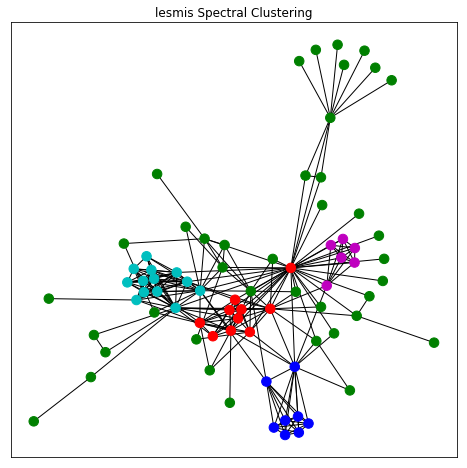

In [153]:
visual_com(nlesmis, lesmis_sc, "lesmis Spectral Clustering")

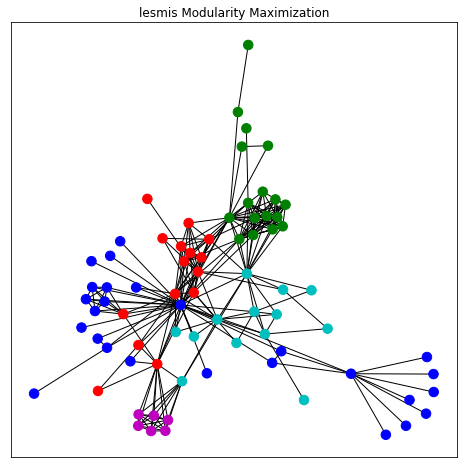

In [197]:
visual_com(nlesmis, lesmis_mm, "lesmis Modularity Maximization")

Παρατηρούμε πως για το lesmis, το μεγαλύτερο modularity εμφανίζεται στην πρωτη μέθοδο (ιεραρχική), με την οποία κατασκευάζεται το δενδρόγραμμα από πάνω προς τα κάτω. Ακολουθεί με μικρή διαφορά η τρίτη μέθοδος (άπληστη), που φτιάχνει το δενδρό από κάτω προς τα πάνω, ενώ τελευταία έρχεται η spectral (φασματική). Οπτικά φαίνεται να είναι καλύτερη επιλογή να είναι 5 οι κοινότητες (άπληστη, φασματική), καθώς στην ιεραρχική μέθοδο που δίνει σαν αποτέλεσμα περισσότερες κοινότητες, οπτικά αυτές δεν είναι διακριτές και τοπικά είναι πολύ κοντά μεταξύ τους, κάτι που δεν συμβαίνει με τις δυο άλλες μεθόδους.

<p>b. Οπτικοποίηση κοινοτήτων American College Football (football).</p>

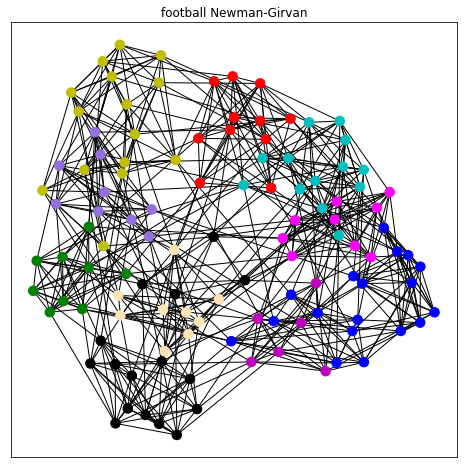

In [157]:
visual_com(nfootball, football_gn, "football Newman-Girvan")

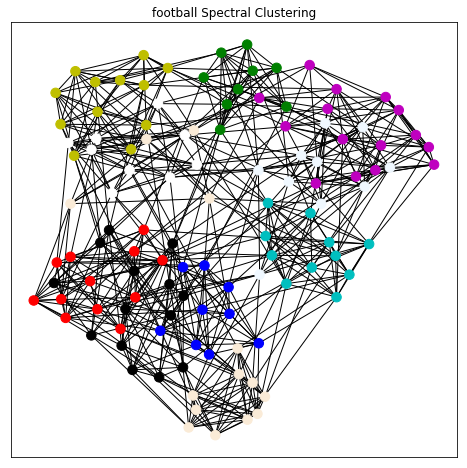

In [198]:
visual_com(nfootball, football_sc, "football Spectral Clustering")

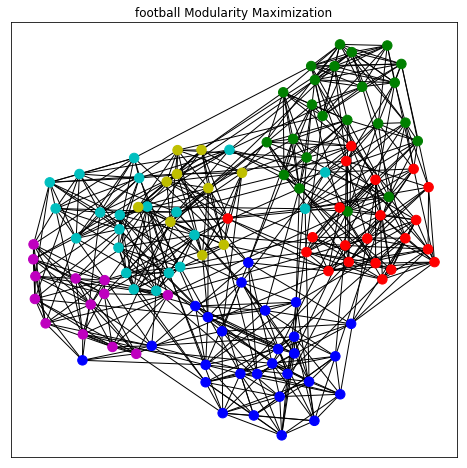

In [155]:
visual_com(nfootball, football_mm, "football Modularity Maximization")

Παρατηρούμε ότι οι επιδόσεις και των τριών μεθόδων δίνουν σχετικά καλές επιδόσεις. Αξιζεί να σημειωθεί ότι οι επιδόσεις αυτές είναι πολύ κοντά μεταξύ τους, με την πρώτη και την δεύτερη μέθοδο σχεδόν να ταυτίζονται. Οπτικά μπορούμε να πούμε ότι και στις τρεις μεθόδους οι κοινότητες είναι σχετικά εύκολα διακριτές, με την άπληστη μέθοδο να είναι λίγο πιο αποτελεσματική, αφού και χωρίς την χρήση χρωμάτων θα ήταν εύκολη η ανίχνευση των κοινοτήτων που προκύπτουν.

<p>c. Οπτικοποίηση κοινοτήτων Dolphins (dolphins).</p>

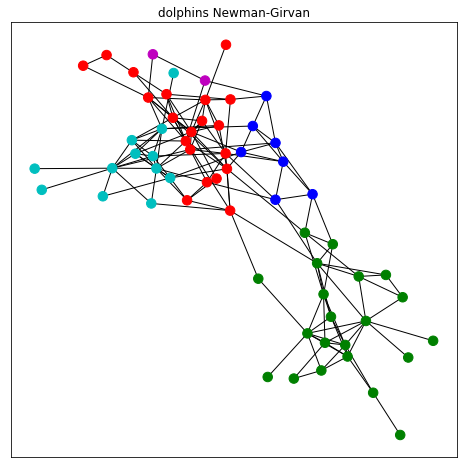

In [158]:
visual_com(ndolphins, dolphins_gn, "dolphins Newman-Girvan")

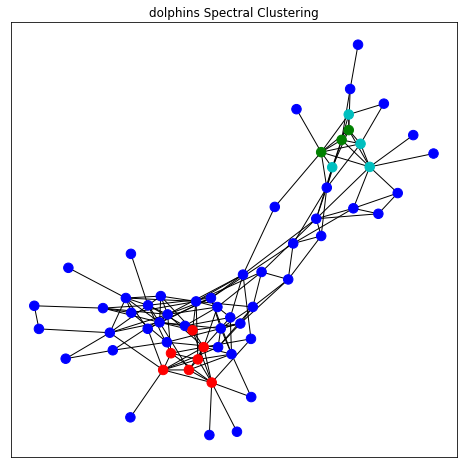

In [159]:
visual_com(ndolphins, dolphins_sc, "dolphins Spectral Clustering")

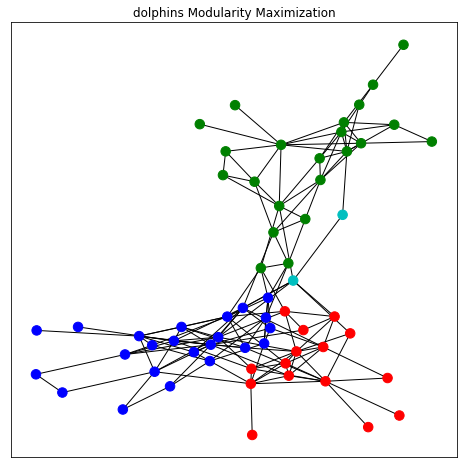

In [161]:
visual_com(ndolphins, dolphins_mm, "dolphins Modularity Maximization")

Παρατηρούμε πως η ιεραρχική και η άπληστη μέθοδος δίνουν αποδόσεις παρόμοιες με εκείνες στο lesmis. Ωστόσο, η φασματική φαίνεται να έχει πολύ μικρή επίδοση και άρα να αδυνατεί να διαχωρίσει κοινότητες στο γράφημα αυτό με αποτελεσματικό τρόπο. Οπτικά παρατηρούμε πως η πρώτη και η τρίτη μέθοδος δίνουν το καλύτερο αποτέλεσμα αφού οι κοινότητες που προκύπτουν είναι πιο ισορροπημένες σε σχέση με αυτές που προκύπτουν από την φασματική.

<p>d. Οπτικοποίηση κοινοτήτων REG.</p>

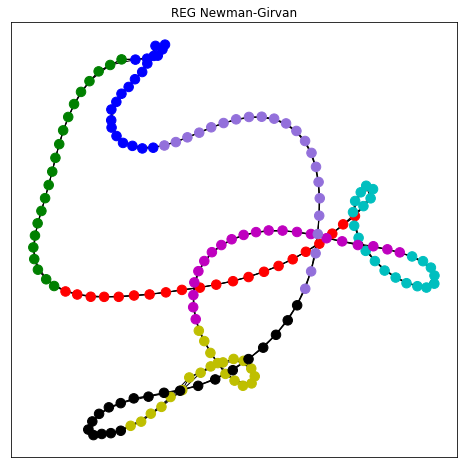

In [162]:
visual_com(REG, reg_gn, "REG Newman-Girvan")

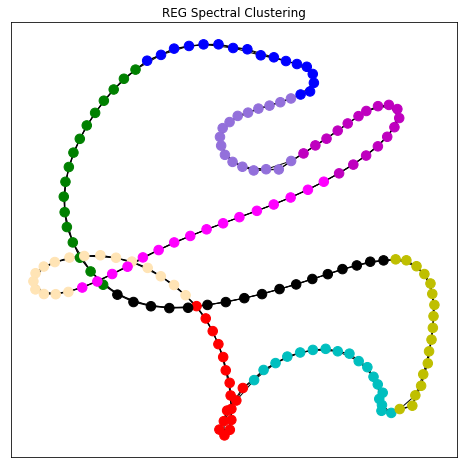

In [163]:
visual_com(REG, reg_sc, "REG Spectral Clustering")

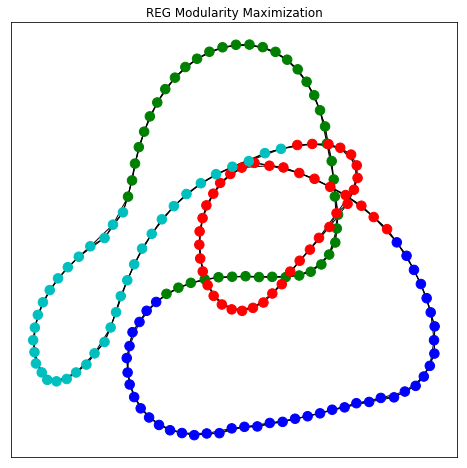

In [164]:
visual_com(REG, reg_mm, "REG Modularity Maximization")

Παρατηρούμε πως για το REG ο διαχωρισμός των κοινοτήτων δίνει τις καλύτερες επιδόσεις, γεγονός που εξηγείται από την σταθερή διάταξη και γεωγραφία του γραφήματός του. Αξίζει να σημειωθεί ότι η τρίτη μέθοδος δίνει λιγό χειρότερη επίδοση από τις άλλες δυο, λόγω της δημιουργίας του δενδρογράμματος από κάτω προς τα πάνω. Οπτικά, και στις τρεις παρατηρούμε τέλειο αποτέλεσμα και την κυκλική μορφή στην διάταξη των κοινοτήτων, μορφή όμοια που λαμβάνουμε και από το κυκλικό lattice.

<p>e. Οπτικοποίηση κοινοτήτων RGER.</p>

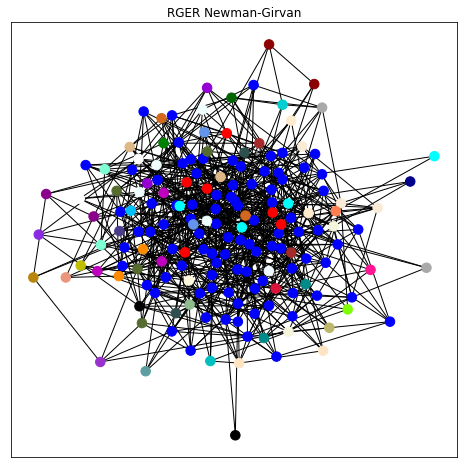

In [172]:
visual_com(RGER, rger_gn, "RGER Newman-Girvan")

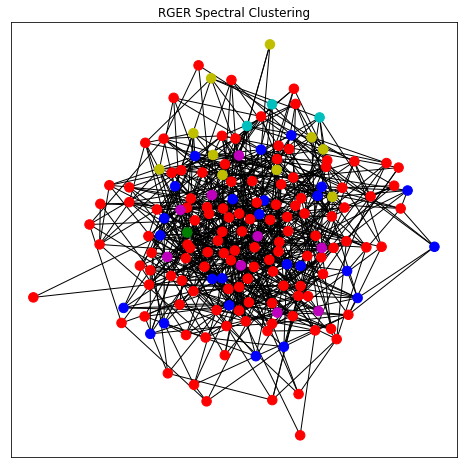

In [173]:
visual_com(RGER, rger_sc, "RGER Spectral Clustering")

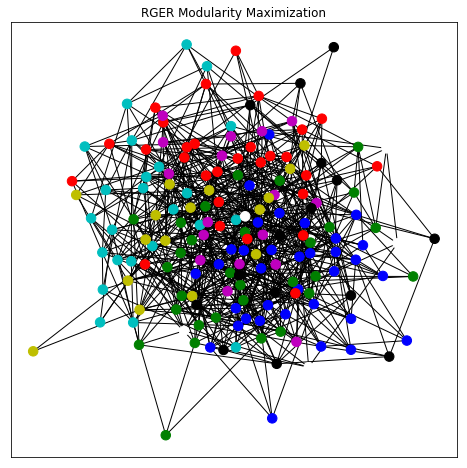

In [174]:
visual_com(RGER, rger_mm, "RGER Modularity Maximization")

Παρατηρούμε πως στο RGER, καμία από τις τρεις μεθόδους δεν δίνει καλή απόδοση. Πιο συγκεκριμένα, και οι τρεις μέθοδοι είναι πάρα πολύ απογοητευτικές και δεν δίνουν την δυνατότητα για αποτελεσματική διαχωριστική ικανότητα σε κοινότητες. Αυτό συμβαίνει, διότι οι συνδέσεις των κόμβων γίνεται με τυχαίο τρόπο, με αποτέλεσμα να καθίσταται πολύ μικρή η πιθανότητα να βρεθούν (διακριτές) κοινότητες στην τοπολογία αυτή. Ωστόσο, αξίζει να σημειωθεί ότι η άπληστη μέθοδος οπτικά επιδεικνύει κάποια αντοχή, λόγω του τρόπου κατασκευής της που εξετάζει κόμβο-κόμβο, καθώς δίνει αρκετές κοινότητες, κάποιες από τις οποίες είναι διακριτές.

<p>f. Οπτικοποίηση κοινοτήτων RGG.</p>

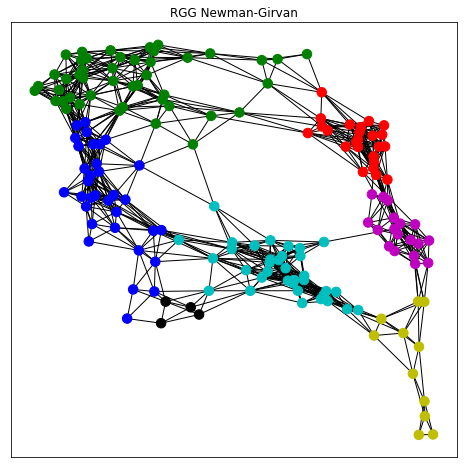

In [175]:
visual_com(RGG, rgg_gn, "RGG Newman-Girvan")

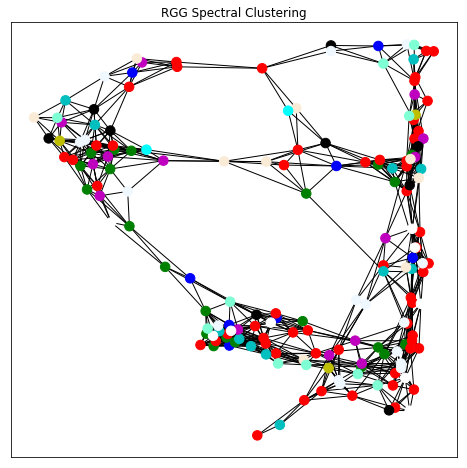

In [199]:
visual_com(RGG, rgg_sc, "RGG Spectral Clustering")

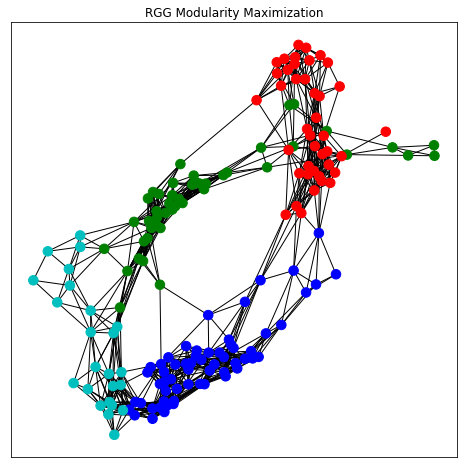

In [177]:
visual_com(RGG, rgg_mm, "RGG Modularity Maximization")

Στο RGG παρατηρούμε πως οι επιδόσεις είναι πολύ καλές. Ειδικά η πρώτη και η τρίτη μέθοδος τόσο ποσοτικά όσο και οπτικά δίνουν αρκετά καλές και παρόμοιες επιδόσεις. Η δεύτερη μέθοδος, ωστόσο, η οποία δίνει πιο χαμηλό modularity από τις άλλες δυο, ποιοτικά φαίνεται να μην είναι αρκετά αποτελεσματική, αφού ουσιαστικά δημιουργούνται τοπικές συσσωρεύσεις από κόμβους διαφορετικής κοινότητας, κάτι που δεν συμβαίνει με τις άλλες δυο μεθόδους, στις οποίες οι κοινότητες είναι τοπικά αρκετά πυκνές από τους κόμβους που τις αποτελούν.

<p>g. Οπτικοποίηση κοινοτήτων SW.</p>

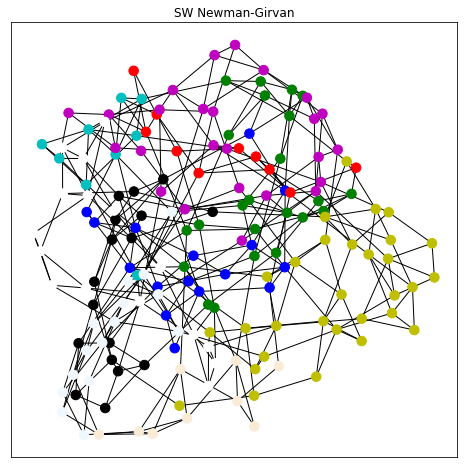

In [178]:
visual_com(SW, sw_gn, "SW Newman-Girvan")

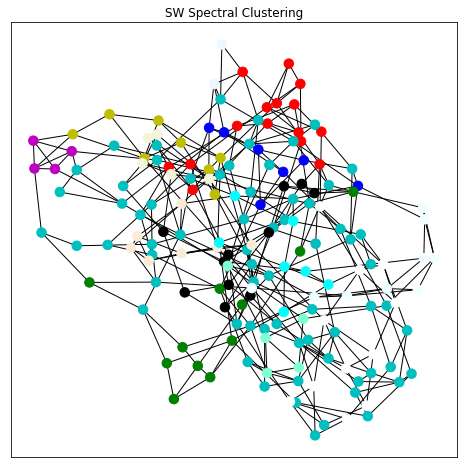

In [179]:
visual_com(SW, sw_sc, "SW Spectral Clustering")

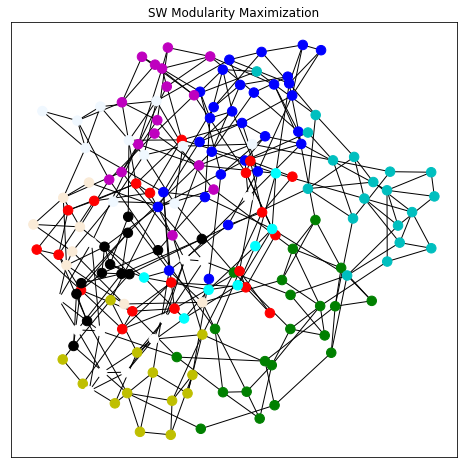

In [180]:
visual_com(SW, sw_mm, "SW Modularity Maximization")

Παρατηρούμε και στο SW, πως οι επιδόσεις της πρώτης και τρίτης μεθόδου υπερτερούν σε σχέση με αυτή της δεύτερης. Σε ένα small-world δίκτυο θα περιμέναμε να σχηματιστούν κοινότητες γύρω από τους μεγάλου degree κόμβους, κάτι το οποίο οπτικά σε γενικές γραμμές το βλέπουμε και με τις τρεις μεθόδους, με εξαίρεση κάποιες κοινότητες που αποτελούνται μόνο από κόμβους μικρού βαθμού.

<p>h. Οπτικοποίηση κοινοτήτων SF.</p>

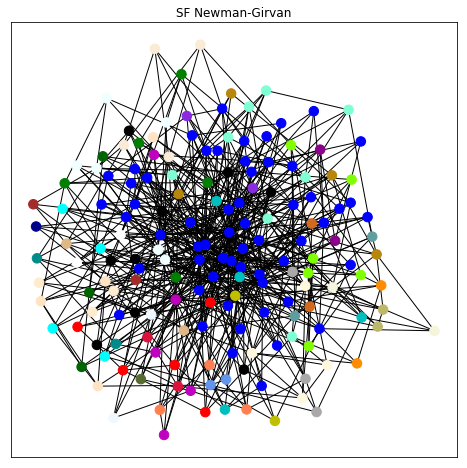

In [181]:
visual_com(SF, sf_gn, "SF Newman-Girvan")

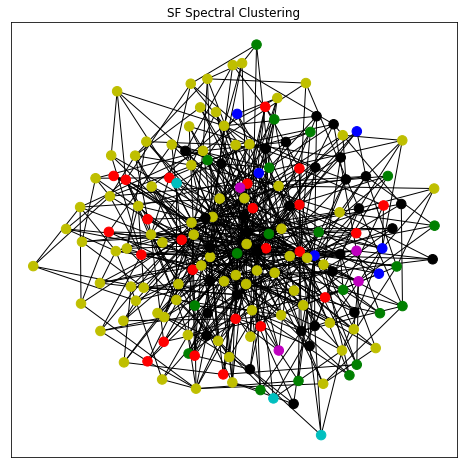

In [182]:
visual_com(SF, sf_sc, "SF Spectral Clustering")

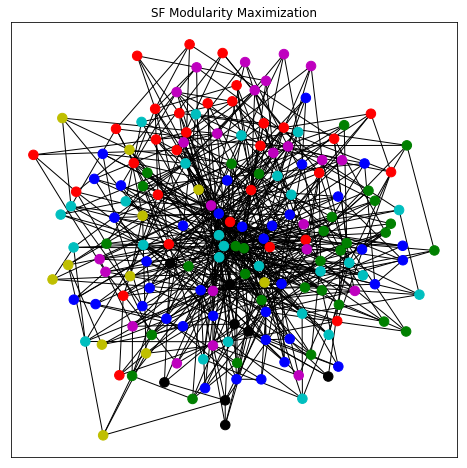

In [183]:
visual_com(SF, sf_mm, "SF Modularity Maximization")

Σε ένα scale-free δίκτυο θα περιμέναμε οι κοινότητες να ήταν γύρω από τους κόμβους μεγάλου βαθμού, όπως και στην περίπτωση του small-world. Από την άλλη, παρατηρούμε πως οι επιδόσεις των τριών μεθόδων είναι σχετικά χαμηλές, εμφανίζοντας μικρές τιμές του modularity. Οπτικά, μπορούμε να πούμε, με επιφύλαξη λόγω του πλήθους των ακμών, πως με την δεύτερη και περισσότερο με την τρίτη μέθοδο δημιουργήθηκαν κοινότητες γύρω από τους κόμβους μεγάλου βαθμού, που ήταν και το επιθυμητό.